## 实验介绍

### 1.实验内容

本实验包括:kNN算法原理的介绍，kNN算法的步骤流程，以及基于kNN算法优化约会网站配对效果。

### 2.实验目标

通过本实验掌握kNN算法的原理，熟悉kNN算法及应用。

### 3.实验知识点

* kNN算法原理
* kNN算法流程
* kNN算法应用

### 4.实验环境

* python 3.6.5
* CourseGrading在线实验环境

### 5.预备知识

* 初等数学知识
* Linux命令基本操作
* Python编程基础
* kNN算法原理


## 实验原理

### 1.kNN算法简介

　　k近邻法(k-nearest neighbor, kNN)是1967年由Cover T和Hart P提出的一种基本分类与回归方法。它的工作原理是：存在一个样本数据集合，也称作为训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一个数据与所属分类的对应关系。输入没有标签的新数据后，将新的数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本最相似数据(最近邻)的分类标签。一般来说，我们只选择样本数据集中前k个最相似的数据，这就是k-近邻算法中k的出处，通常k是不大于20的整数。最后，选择k个最相似数据中出现次数最多的分类，作为新数据的分类。

### 2.kNN算法流程

　　a.计算已知类别数据集中的点与当前点之间的距离；  
　　b.按照距离递增次序排序；  
　　c.选取与当前点距离最小的k个点；  
　　d.确定前k个点所在类别的出现频率；  
　　e.返回前k个点所出现频率最高的类别作为当前点的预测分类。

## 实验准备

点击屏幕右上方的下载实验数据模块，选择下载kNN_Dating.tgz到指定目录下，然后再依次选择点击上方的File->Open->Upload,上传刚才下载的数据集压缩包，再使用如下命令解压：

In [5]:
!tar -zxvf kNN_Dating.tgz

kNN_Dating/
kNN_Dating/datingTestSet.txt


数据集文件为datingTestSet.txt

## 实验步骤：实现kNN核心算法

如前所述，kNN算法流程如下：  
　　a.计算已知类别数据集中的点与当前点之间的距离；  
　　b.按照距离递增次序排序；  
　　c.选取与当前点距离最小的k个点；  
　　d.确定前k个点所在类别的出现频率；  
　　e.返回前k个点所出现频率最高的类别作为当前点的预测分类。  
在kNN.py中，添加一个函数classify0作为kNN算法的核心函数，该函数的完整形式为：  
　　def classify0(inX, dataSet, labels, k):  
其中各个参数的含义如下:  

* inX - 用于要进行分类判别的数据(来自测试集)
* dataSet - 用于训练的数据(训练集)
* lables - 分类标签
* k - kNN算法参数,选择距离最小的k个点  

在上述参数列表中，dataSet为所有训练数据的集合，也就是表示所有已知类别数据集中的所有点，dataSet为一个矩阵，其中每一行表示已知类别数据集中的一个点。inX为一个向量，表示当前要判别分类的点。按照上述算法流程，我们首先应该计算inX这个要判别分类的点到dataSet中每个点之间的距离。dataSet中每个点也是用一个向量表示的，点与点之间的距离怎么计算呢？没错，就是求两向量之间的距离，数学上，我们知道有很多距离计算公式，包括但不限于：

* 欧氏距离  
* 曼哈顿距离  
* 切比雪夫距离  
* 闵可夫斯基距离
* 标准化欧氏距离
* 马氏距离  
* 夹角余弦  
* 汉明距离  
* 杰卡德距离& 杰卡德相似系数  
* 信息熵

这里，我们选择最简单的欧式距离计算方法。设p和q为两向量，则两向量间的欧氏距离为：  
![](1_kNN_Dating.jpg)  
在算法流程，输入参数含义，以及距离计算公式都明确了以后，按照kNN算法的流程，我们就可以实现kNN算法了。这里，我们使用numpy提供的各种功能来实现该算法，相比于自己纯手写各种线性代数变换操作，使用numpy的效率要高的多。classify0的实现如下：

In [6]:
import numpy as np
import operator
from os import listdir

def classify0(inX, dataSet, labels, k):
	m=dataSet.shape[0]  #返回dataSet的行数，即已知数据集中的所有点的数量
	diffMat=np.tile(inX,(m, 1))-dataSet #行向量方向上将inX复制m次，然后和dataSet矩阵做相减运算
	sqDiffMat = diffMat**2 #减完后，对每个数做平方
	sqDistances = sqDiffMat.sum(axis=1) #平方后按行求和，axis=0表示列相加，axis=1表示行相加
	distances = sqDistances *0.5 #开方计算出欧式距离
	sortedDistIndices = distances.argsort() #对距离从小到大排序，注意argsort函数返回的是数组值从小到大的索引值
	classCount = {} #用于类别/次数的字典，key为类别， value为次数  
	for i in range(k):
		voteIlabel = labels[sortedDistIndices[i]] #取出第近的元素对应的类别
		classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1 #对类别次数进行累加
	sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True) #根据字典的值从大到小排序
	return sortedClassCount[0][0]  #返回次数最多的类别,即所要分类的类别

classify0函数的完整实现如上所示，第2行获得数据集的行数，即已知数据集中所有点的数量。第3到第6行为计算要分类的点到数据集中每个点的距离，计算过程中用到很多numpy的特性。第7行按照距离远近从近到远排序，注意argsort返回的是原始下标排序后的下标序列。从第8行到第11，统计距离最近的前k个点中每个类别出现的次数。第12行到第13行取出出现频率最高的分类。  

## 实验步骤：kNN算法小实验 

至此，kNN的算法就已经写完了。接下来，我们用个小例子验证一下kNN算法，随机挑选的6位高中生，分别让他们做文科综合试卷的分数和理科综合试卷的分数，下表为分数以及分类信息。  
![](2_kNN_Dating.png)  
直觉上，理科生的理综成绩比较高，文综成绩较低，文科生的文综成绩较高，理综成绩较高。基于这些信息，我们利用kNN算法判断成绩为（105,210）所属的分类，代码实现如下：

In [7]:
dataSet=np.array([[250,100],[270,120],[111,230],[130,260],[200,80],[70,190]])
labels=["理科生","理科生","文科生","文科生","理科生","文科生"]
inX=[105,210]
print(classify0(inX,dataSet,labels,3))

文科生


运行结果如下显示“文科生”，输出结果结果比较符合预期。

##  实验步骤：【约会网站配对效果改进】-背景 

上面的k-近邻算法流程并不完整，k-近邻算法的一般流程：

* 收集数据：可以使用爬虫进行数据的收集，也可以使用第三方提供的免费或收费的数据。一般来讲，数据放在txt文本文件中，按照一定的格式进行存储，便于解析及处理。
* 准备数据：使用Python解析、预处理数据。
* 分析数据：可以使用很多方法对数据进行分析，例如使用Matplotlib将数据可视化。
* 测试算法：计算错误率。
* 使用算法：错误率在可接受范围内，就可以运行k-近邻算法进行分类。

已经了解了k-近邻算法的一般流程，下面开始进入实战内容。

海伦女士一直使用在线约会网站寻找适合自己的约会对象。尽管约会网站会推荐不同的任选，但她并不是喜欢每一个人。经过一番总结，她发现自己交往过的人可以进行如下分类：

* 不喜欢的人
* 魅力一般的人
* 极具魅力的人

海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中，每个样本数据占据一行，总共有1000行。datingTestSet.tx放在当前项目下，你可以直接使用该数据集。

 海伦收集的样本数据主要包含以下3种特征：

* 每年获得的飞行常客里程数
* 玩视频游戏所消耗时间百分比
* 每周消费的冰淇淋公升数

![](3_kNN_Dating.jpg)

## 实验步骤：【约会网站配对效果改进】-准备数据数据解析 

在将上述特征数据输入到分类器前，必须将待处理的数据的格式改变为分类器可以接收的格式。从上面已经知道，要将数据分类两部分，即特征矩阵和对应的分类标签向量。定义名为file2matrix的函数，以此来处理输入格式问题。编写代码如下：

In [8]:
def file2matrix(filename):
    #打开文件
    fr = open(filename)
    #读取文件所有内容
    arrayOLines = fr.readlines()
    #得到文件行数
    numberOfLines = len(arrayOLines)
    #返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
    returnMat = np.zeros((numberOfLines,3))
    #返回的分类标签向量
    classLabelVector = []
    #行的索引值
    index = 0
    for line in arrayOLines:
        #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip()
        #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
        listFromLine = line.split('\t')
        #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index,:] = listFromLine[0:3]
        #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector

可以看到，已经顺利导入数据，并对数据进行解析，格式化为分类器需要的数据格式。输出的第一部分为特征矩阵，第二部分为标签向量。接着我们可以通过友好、直观的图形化的方式观察数据的真正含义。

## 实验步骤：【约会网站配对效果改进】-分析数据数据可视化 

编写名为showdatas的函数，用来将数据可视化。编写代码如下：

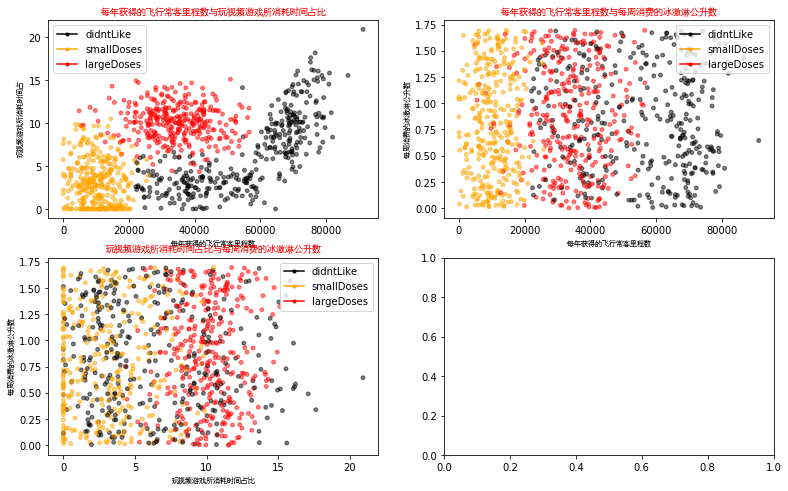

In [13]:
import zipfile
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

def showdatas(datingDataMat, datingLabels):
    #设置汉字格式
    zip_file = zipfile.ZipFile("wqy-zenhei.zip")
    for fileM in zip_file.namelist(): 
        zip_file.extract(fileM,"")
    zip_file.close();
    font = FontProperties(fname="wqy-zenhei.ttc", size=14)
    #font = FontProperties(zip_file, size=14)
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',FontProperties=font)
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占',FontProperties=font)
    plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',FontProperties=font)
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs1_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',FontProperties=font)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs2_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()

if __name__ == '__main__':
    #打开的文件名
    filename = "kNN_Dating/datingTestSet.txt"
    #打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    showdatas(datingDataMat, datingLabels)

   通过数据可以很直观的发现数据的规律，比如以玩游戏所消耗时间占比与每年获得的飞行常客里程数，只考虑这二维的特征信息，可以发现海伦更喜欢有生活质量的男人。为什么这么说呢？每年获得的飞行常客里程数表明，海伦喜欢能享受飞行常客奖励计划的男人，但是不能经常坐飞机，疲于奔波，满世界飞。同时，这个男人也要玩视频游戏，并且占一定时间比例。能到处飞，又能经常玩游戏的男人是什么样的男人？很显然，有生活质量，并且生活悠闲的人。当然，大家可以尝试着从不同的角度去分析和理解数据可视化后呈现的规律。

## 实验步骤：【约会网站配对效果改进】-准备数据数据归一化

下表给出了四组样本，如果想要计算样本3和样本4之间的距离，可以使用欧拉公式计算。  
![](4_kNN_Dating.png)  
计算方法如下图所示：  
![](5_kNN_Dating.jpg)  
容易发现，上面方程中数字差值最大的属性对计算结果的影响最大，也就是说，每年获取的飞行常客里程数对于计算结果的影响将远远大于表中其他两个特征-玩视频游戏所耗时间占比和每周消费冰淇淋公斤数的影响。而产生这种现象的唯一原因，仅仅是因为飞行常客里程数远大于其他特征值。但海伦认为这三种特征是同等重要的，因此作为三个等权重的特征之一，飞行常客里程数并不应该如此严重地影响到计算结果。  
在处理这种不同取值范围的特征值时，我们通常采用的方法是将数值归一化，如将取值范围处理为０到１或者-１到１之间。下面的公式可以将任意取值范围的特征值转化为０到１区间内的值：  
newValue = (oldValue - min) / (max - min)    
其中min和max分别是数据集中的最小特征值和最大特征值。虽然改变数值取值范围增加了分类器的复杂度，但为了得到准确结果，我们必须这样做。编写名为autoNorm的函数，用该函数自动将数据归一化，代码如下：

In [15]:
def autoNorm(dataSet):
    #获得数据的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    #最大值和最小值的范围
    ranges = maxVals - minVals
    #shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    #返回dataSet的行数
    m = dataSet.shape[0]
    #原始值减去最小值
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    #除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    #返回归一化数据结果,数据范围,最小值
    return normDataSet, ranges, minVals

if __name__ == '__main__':
    #打开的文件名
    filename = "kNN_Dating/datingTestSet.txt"
    #打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    normDataSet, ranges, minVals = autoNorm(datingDataMat)
    print(normDataSet)
    print(ranges)
    print(minVals)

[[ 0.44832535  0.39805139  0.56233353]
 [ 0.15873259  0.34195467  0.98724416]
 [ 0.28542943  0.06892523  0.47449629]
 ..., 
 [ 0.29115949  0.50910294  0.51079493]
 [ 0.52711097  0.43665451  0.4290048 ]
 [ 0.47940793  0.3768091   0.78571804]]
[  9.12730000e+04   2.09193490e+01   1.69436100e+00]
[ 0.        0.        0.001156]


从上图的运行结果可以看到，已经顺利将数据归一化了，并且求出了数据的取值范围和数据的最小值，这两个值是在分类的时候需要用到的，直接先求解出来，相当于对数据进行了预处理。

## 实验步骤：【约会网站配对效果改进】-测试算法验证分类器 

机器学习算法一个很重要的工作就是评估算法的正确率，通常我们只提供已有数据的90%作为训练样本来训练分类器，而使用其余的10%数据去测试分类器，检测分类器的正确率。需要注意的是，10%的测试数据应该是随机选择的，由于海伦提供的数据并没有按照特定目的来排序，所以你可以随意选择10%数据而不影响其随机性。  
为了测试分类器效果，创建函数datingClassTest，保存为kNN_date04.py文件，编写代码如下：

In [17]:
def datingClassTest():
    #打开的文件名
    filename = "kNN_Dating/datingTestSet.txt"
    #将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
    datingDataMat, datingLabels = file2matrix(filename)
    #取所有数据的百分之十
    hoRatio = 0.10
    #数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #获得normMat的行数
    m = normMat.shape[0]
    #百分之十的测试数据的个数
    numTestVecs = int(m * hoRatio)
    #分类错误计数
    errorCount = 0.0

    for i in range(numTestVecs):
        #前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],
            datingLabels[numTestVecs:m], 4)
        print("分类结果:%d\t真实类别:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("错误率:%f%%" %(errorCount/float(numTestVecs)*100))

if __name__ == '__main__':
    datingClassTest()

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3

从上图验证分类器结果中可以看出，错误率是4%，这是一个想当不错的结果。我们可以改变函数datingClassTest内变量hoRatio和分类器k的值，检测错误率是否随着变量值的变化而增加。依赖于分类算法、数据集和程序设置，分类器的输出结果可能有很大的不同。

 ## 实验步骤：【约会网站配对效果改进】-使用算法构建完整可用系统 

我们可以给海伦一个小段程序，通过该程序海伦会在约会网站上找到某个人并输入他的信息，程序会给出她对男方喜欢程度的预测值。创建函数classifyPerson，代码如下：

In [19]:
def classifyPerson():
    #输出结果
    resultList = ['讨厌','有些喜欢','非常喜欢']
    #三维特征用户输入
    precentTats = float(input("玩视频游戏所耗时间百分比:"))
    ffMiles = float(input("每年获得的飞行常客里程数:"))
    iceCream = float(input("每周消费的冰激淋公升数:"))
    #打开的文件名
    filename = "kNN_Dating/datingTestSet.txt"
    #打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    #训练集归一化
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #生成NumPy数组,测试集
    inArr = np.array([ffMiles, precentTats, iceCream])
    #测试集归一化
    norminArr = (inArr - minVals) / ranges
    #返回分类结果
    classifierResult = classify0(norminArr, normMat, datingLabels, 3)
    #打印结果
    print("你可能%s这个人" % (resultList[classifierResult-1]))

if __name__ == '__main__':
    classifyPerson()

玩视频游戏所耗时间百分比:12
每年获得的飞行常客里程数:44000
每周消费的冰激淋公升数:0.5
你可能非常喜欢这个人


运行程序，并输入数据(12,44000,0.5)，预测结果是”你可能非常喜欢这个人”，结果如下图所示:

## 参考文献及延伸阅读

### 参考资料：

1.哈林顿，李锐. 机器学习实战 : Machine learning in action[M]. 人民邮电出版社, 2013.  
2.周志华. 机器学习:Machine learning[M]. 清华大学出版社, 2016.

### 延伸阅读：

1.李航. 统计学习方法[M]. 清华大学出版社, 2012.

## 后续实训

基于kNN算法的实训类实验，包括：  

* 基于kNN的手写字识别
* 基于kNN的约会网站效果判定
* 基于kNN的乳腺癌分类  

通过以上实训实验，可进一步加强对kNN理论、算法、应用等各方面知识的掌握。

## 实验总结

### 1.指导思想

kNN算法的指导思想是“近朱者赤，近墨者黑”，由你的邻居来推断出你的类别。先计算待分类样本与已知类别的训练样本之间的距离，找到距离与待分类样本数据最近的k个邻居；再根据这些邻居所属的类别来判断待分类样本数据的类别。用空间内两个点的距离来度量。距离越大，表示两个点越不相似。距离的选择有很多，通常用比较简单的欧式距离。

### 2. 类别的判定

投票决定：少数服从多数，近邻中哪个类别的点最多就分为该类。  

加权投票法：根据距离的远近，对近邻的投票进行加权，距离越近则权重越大（权重为距离平方的倒数）

### 3.优点

* 简单，易于理解，易于实现，无需估计参数，无需训练；
* 适合对稀有事件进行分类；
* 特别适合于多分类问题(multi-modal,对象具有多个类别标签)， kNN比SVM的表现要好。

### 4.缺点

* 懒惰算法，对测试样本分类时的计算量大，内存开销大，评分慢；
* 当样本不平衡时，如一个类的样本容量很大，而其他类样本容量很小时，有可能导致当输入一个新样本时，该样本的K个邻居中大容量类的样本占多数；
* 可解释性较差，无法给出决策树那样的规则。

### 5.常见问题

* k值的设定  
k值选择过小，得到的近邻数过少，会降低分类精度，同时也会放大噪声数据的干扰；而如果k值选择过大，并且待分类样本属于训练集中包含数据数较少的类，那么在选择k个近邻的时候，实际上并不相似的数据亦被包含进来，造成噪声增加而导致分类效果的降低。  
如何选取恰当的K值也成为KNN的研究热点。k值通常是采用交叉检验来确定（以k=1为基准）。经验规则：k一般低于训练样本数的平方根。

* 类别的判定方式  
投票法没有考虑近邻的距离的远近，距离更近的近邻也许更应该决定最终的分类，所以加权投票法更恰当一些。

* 距离度量方式的选择  
高维度对距离衡量的影响：众所周知当变量数越多，欧式距离的区分能力就越差。  
变量值域对距离的影响：值域越大的变量常常会在距离计算中占据主导作用，因此应先对变量进行标准化。

* 训练样本的参考原则  
学者们对于训练样本的选择进行研究，以达到减少计算的目的，这些算法大致可分为两类。第一类,减少训练集的大小。KNN算法存储的样本数据,这些样本数据包含了大量冗余数据,这些冗余的数据增了存储的开销和计算代价。缩小训练样本的方法有:在原有的样本中删掉一部分与分类相关不大的样本样本,将剩下的样本作为新的训练样本;或在原来的训练样本集中选取一些代表样本作为新的训练样本；或通过聚类,将聚类所产生的中心点作为新的训练样本。  
在训练集中，有些样本可能是更值得依赖的。可以给不同的样本施加不同的权重，加强依赖样本的权重，降低不可信赖样本的影响。

* 性能问题  
kNN是一种懒惰算法，而懒惰的后果：构造模型很简单，但在对测试样本分类地的系统开销大，因为要扫描全部训练样本并计算距离。已经有一些方法提高计算的效率，例如压缩训练样本量等。